In [57]:
import pandas as pd 
import numpy as np
import geopandas as gpd

привязка данных OSM к классификатору

In [39]:
peaks_osm = gpd.read_file('bezengi_data.gpkg', layer = 'peaks')[['full_id', "name", "geometry"]]
peaks_far = pd.read_excel('classificator/classificator.xlsx')

C:\Users\ermolaevNR\.conda\envs\GIS38\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


<AxesSubplot:>

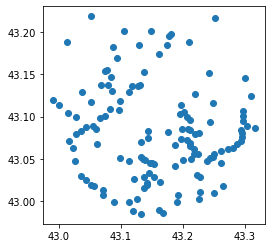

In [40]:
peaks_osm.plot()

In [41]:
peaks_osm["name_"] = peaks_osm.name.str.lower()
peaks_far["name_"] = peaks_far["Наименование вершины"].str.lower()



In [42]:
peaks_far

,№ п.п.,Наименование вершины,Высота в м,Категория сложности,Характер маршрута,Маршрут,"Руководитель, год прохождения",name_
0,1,Агунда,3984.0,2А,к,З гребню,"В. Заряев, 2016",агунда
1,2,Ак-Кая,3367.0,5Б,ск,левой части ЮЗ стены,"О. Шаров, 1979",ак-кая
2,3,Ак-Кая,3367.0,5Б,ск,левой части ЮЗ стены,"К. Корабельников, 2003",ак-кая
3,4,Ак-Кая,3367.0,5Б,ск,ЮЗ стене,"Б. Васильев, 1979",ак-кая
4,5,Ак-Кая,3367.0,5Б,ск,ЮЗ стене,"В. Шамало, 2003",ак-кая
...,...,...,...,...,...,...,...,...
260,250,Экрздыген,3160.0,1Бз,к,С гребню,"Т. Тимошенко, 2012",экрздыген
261,251,4310,4310.0,3Б,к,СВ гребню,"В. Соловей, 1932",NaN
262,252,4310 – Гестола,NaN,4А,к,"СВ гребню, траверс","А. Гермогенов, 1932",4310 – гестола
263,253,4443,4443.0,3Б,к,ЮЗ кулуару и СЗ гребню,"Н. Анисимов, 2004",NaN


In [44]:
peaks = peaks_osm.merge(peaks_far,on = 'name_', how = 'inner')
peaks

,full_id,name,geometry,name_,№ п.п.,Наименование вершины,Высота в м,Категория сложности,Характер маршрута,Маршрут,"Руководитель, год прохождения"
0,n287407114,Дыхтау (Гл.),MULTIPOINT (43.13318 43.05222),дыхтау (гл.),63,Дыхтау (Гл.),5223.0,4Б,к,С гребню,"Д. Коккин, 1888"
1,n287407114,Дыхтау (Гл.),MULTIPOINT (43.13318 43.05222),дыхтау (гл.),64,Дыхтау (Гл.),5223.0,4Б,к,ЮЗ гребню,"А. Муммери, 1888"
2,n287407114,Дыхтау (Гл.),MULTIPOINT (43.13318 43.05222),дыхтау (гл.),65,Дыхтау (Гл.),5223.0,4Б,к,З гребню,"Б. Гарф, 1938"
3,n287407114,Дыхтау (Гл.),MULTIPOINT (43.13318 43.05222),дыхтау (гл.),66,Дыхтау (Гл.),5223.0,5А,к,В кф. С гребня,"Н. Иванов, 1982"
4,n287407114,Дыхтау (Гл.),MULTIPOINT (43.13318 43.05222),дыхтау (гл.),67,Дыхтау (Гл.),5223.0,5А,к,ЮЗ склону,"Е. Гасилов, 1984"
...,...,...,...,...,...,...,...,...,...,...,...
172,n6012735522,Семеновского,MULTIPOINT (43.09896 43.05073),семеновского,175,Семеновского,4082.0,1Б,ск,Ю гребню,"Ю. Слезин, 1963"
173,n6012735522,Семеновского,MULTIPOINT (43.09896 43.05073),семеновского,176,Семеновского,4082.0,2А,к,В гребню,"Ю. Саратов, 1975"
174,n6012735522,Семеновского,MULTIPOINT (43.09896 43.05073),семеновского,177,Семеновского,4082.0,2Б,к,с запада по леднику,"В. Макаров, 1986"
175,n6012735522,Семеновского,MULTIPOINT (43.09896 43.05073),семеновского,178,Семеновского,4082.0,3А,к,СЗ кф.,"А. Паункскнис, 1964"


In [56]:
marsh = peaks['Маршрут'].str.split(' ', expand=True).values

array([['С', 'гребню', None, ..., None, None, None],
       ['ЮЗ', 'гребню', None, ..., None, None, None],
       ['З', 'гребню', None, ..., None, None, None],
       ...,
       ['с', 'запада', 'по', ..., None, None, None],
       ['СЗ', 'кф.', None, ..., None, None, None],
       ['С', 'стене', None, ..., None, None, None]], dtype=object)

In [69]:
marsh[np.isin(marsh, [None])] = 'not'

In [72]:
np.unique(marsh)

array(['', '(вариант)', '2-го', '2-му', '4-му', 'not', '«каскадам»', 'В',
       'З', 'З-му', 'Катынского', 'С', 'СВ', 'СЗ', 'Ю', 'ЮВ', 'ЮЗ',
       'главному', 'гребню', 'гребню-склону', 'гребня', 'доске',
       'жандарма', 'запада', 'и', 'канту', 'кулуару', 'кф.', 'левой',
       'левому', 'ледника', 'леднику', 'плато', 'по', 'правой', 'правому',
       'ребра', 'ребру', 'с', 'севера', 'северо-востока', 'седловину',
       'склону', 'стене', 'стены', 'траверс', 'центр.', 'центру', 'части',
       'через', 'юга', 'юго-запада', 'языку'], dtype=object)

In [86]:
marsh[np.isin(marsh, ['С', 'СВ', 'СЗ', 'Ю', 'ЮВ', 'ЮЗ', 'В', 'З'], invert = True)] = ''

In [93]:
marsh

array([['С', '', '', ..., '', '', ''],
       ['ЮЗ', '', '', ..., '', '', ''],
       ['З', '', '', ..., '', '', ''],
       ...,
       ['', '', '', ..., '', '', ''],
       ['СЗ', '', '', ..., '', '', ''],
       ['С', '', '', ..., '', '', '']], dtype=object)

In [92]:
np.concatenate(marsh , axis = 2)

AxisError: axis 2 is out of bounds for array of dimension 1

In [11]:
mask = gpd.read_file('bezengi_demo_project/bezengi_data.gpkg', layer='cut_boundary')

<AxesSubplot:>

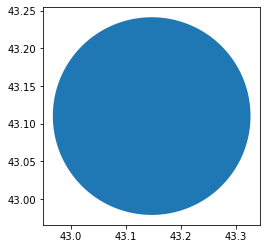

Обработка данных GLIMS

In [35]:
#в данных есть какой то не ясный пиздец на стаковерфло есть решение он округляет координаты до заданного знака (precision)
import numpy as np
from shapely.geometry import shape, mapping
def around(coords, precision=5):
    result = []
    try:
        return round(coords, precision)
    except TypeError:
        for coord in coords:
            result.append(around(coord, precision))
    return result
def layer_precision(geometry, precision=5):
    geojson = mapping(geometry)
    geojson['coordinates'] = around(geojson['coordinates'],precision)
    return shape(geojson)


In [48]:
ice = gpd.read_file('ice/glims_polygons.shp') 
ice = ice.explode() #раскрыть мультиполигоны в полигоны 
ice.loc[:,"geometry"] = ice["geometry"].apply(lambda x: layer_precision(x, precision=5)) #округляем геометрии по пятому знаку 

In [59]:
ice = ice[ice.geog_area == 'Caucausus Region'] #нашел признак по которому можно резать - оставляем только кавказ

In [61]:
gpd.clip(ice, mask)

TopologyException: Input geom 0 is invalid: Self-intersection at or near point 43.108800000000002 43.130699999999997 0 at 43.108800000000002 43.130699999999997 0


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.polygon.Polygon object at 0x000001A53FAA3040>

In [62]:
ice.to_file('ice.geojson')

нужно отфильровать данные по времени + уникальности 